## **[상관 분석 + 히트맵]**

### **타이타닉호 생존율 분석하기**

### **분석 미리보기**

* 목표: 타이타닉호 승객 변수를 분석하여 생존율과의 상관관계를 찾는다.
* 핵심 개념: 상관 분석, 상관 계수, 피어슨 상관 계수, 히트맵
* 데이터 수집: 타이타닉 데이터(seaborn 내장 데이터셋)
* 데이터 준비: 결측치 치환(중앙값 치환, 최빈값 치환)
* 데이터 탐색:
    1. 정보 확인: info()
    2. 차트를 통한 데이터 탐색: pie(), countplot()
* 데이터 모델링:
    1. 모든 변수 간 상관 관계 구하기
    2. 지정한 두 변수 간 상관계수 구하기

### **핵심 개념 이해하기**

* 상관 분석:
    상관 분석(correlation analysis)은 두 변수가 어떤 선형적 관계에 있는지를 분석하는 방법이다. 두 변수는 서로 독립적이거나 상관된 관계일 수 있는데, 두 변수의 관계의 강도를 상관관계라고 한다. 상관 분석에서는 상관관계의 정도를 나타내는 단위로 모상관 계수 p를 사용한다.

    인과 관계를 분석하는 회귀 분석과 달리 상관 계수(correlation coefficient)는 두 변수가 연관된 정도를 나타낼 뿐 인과 관계를 설명하지 않으므로 정확한 예측치를 계산할 수는 없다.
    * 단순 상관 분석(simple correlation analysis): 두 변수가 어느 정도 강한 관계에 있는지 측정한다.
    * 다중 상관 분석(multiple correlation analysis): 세 개 이상의 변수 간 관계의 강도를 측정한다.
    이때, 다른 변수와의 관계를 고정하고 두 변수 간 관계의 강도를 나타내는 것을 편상관 분석(partial correlation analysis)이라고 한다.

* 상관 계수 p:
    상관 계수 p는 변수 간 관계의 정도(0~1)와 방향(+,-)을 하나의 수치로 요약해주는 지수로 -1에서 +1 사이의 값을 가진다.
    상관 계수가 +이면 양의 상관계수이며 한 변수가 증가하면 다른 변수도 증가한다.
    상관 계수가 -이면 음의 상관계수이며 한 변수가 증가할 때 다른 변수는 감소한다.

    상관 계수에 대한 해석은 분야에 따라 다르지만 일반적으로 다음과 같다.
    * 0.0~0.2: 상관관계가 거의 없다.
    * 0.2~0.4: 약한 상관관계가 있다.
    * 0.4~0.6: 상관관계가 있다.
    * 0.6~0.8: 강한 상관관계가 있다.
    * 0.8~1.0: 매우 강한 상관관계가 있다.

* 피어슨 상관 계수:
    상관 계수 중에서 많이 사용하는 것은 피어슨 상관 계수(Pearson correlation coefficient)이다.
    피어슨 상관 계수는 r로 표현한다.

* 상관 분석 결과의 시각화:
    상관 분석 결과를 시각화할 때는 두 변수의 관계를 보여주는 산점도나 히트맵을 많이 사용한다.

### **데이터 수집**

프로젝트에 사용할 타이타닉호 생존자에 대한 데이터는 파이썬의 seaborn 라이브러리 패키지에서 제공하는 타이타닉 데이터를 사용한다.

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.to_csv('./titanic.csv', index=False)

### **데이터 준비**

저장한 titanic.csv 파일을 열어서 데이터 정리 작업이 필요한지 확인해본다.

age와 embarked, deck, embark_town 항목 중에 결측값(누락된 값)이 있다.
결측값이 있으면 정확한 분석을 할 수 없으므로 치환해서 채워야 한다.
age의 결측값은 중앙값으로 치환하고 embarked와 embark_town은 최빈값으로 치환한다.
deck는 형식이 category이므로 최빈 category로 바꾸어 채워넣는다.

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [6]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [7]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [8]:
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [9]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [10]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [11]:
titanic['deck'] = titanic['deck'].fillna('C')

In [12]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### **데이터 탐색**

데이터의 기본 정보를 탐색해본다.

#### **데이터의 기본 정보 탐색하기**

titanic 데이터의 기본 정보를 탐색하기 위해 info() 함수를 사용한다.

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

전체 샘플의 수는 891개이고 속성은 15개이다.
샘플 891 명 중에서 생존자는 342명이고 사망자는 549 명이다.

pclass와 class는 객실 등급을 나타내고, sibsp는 탑승한 형제자매와 배우자 수, parch는 함께 탑승한 부모/자식 수를 나타낸다.
embarked와 embark_town은 탑승 항구를 나타내고 adult_male은 성인 남자 여부를, alone은 동행 여부를 True/False로 나타낸다.

#### **차트를 그려 데이터를 시각적으로 탐색하기**

데이터 탐색을 시각적으로 쉽게 하기 위해 차트를 그려본다.

In [15]:
import matplotlib.pyplot as plt

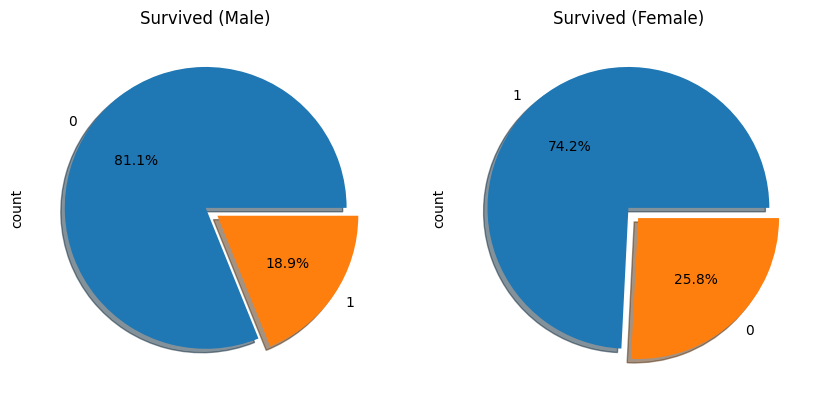

In [29]:
f,ax = plt.subplots(1, 2, figsize = (10, 5))

titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

남자 승객의 생존율은 18.9%이고, 여자 승객의 생존율은 74.2%라는 것을 확인할 수 있다.

#### **등급별 생존자 수를 차트로 나타내기**

이번에는 객실 등급 카테고리별 생존자수를 계산해 차트로 나타내본다.
이를 위해 seaborn 패키지에서 제공하는 countplot() 함수를 사용한다.

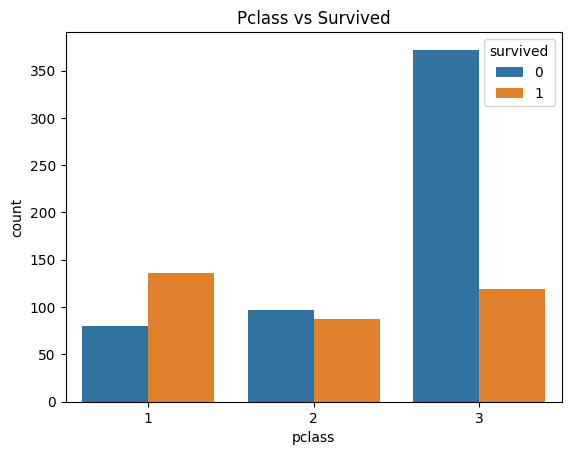

In [32]:
sns.countplot(x='pclass', hue = 'survived', data = titanic)
plt.title('Pclass vs Survived')
plt.show()

객실 등급별로 살펴보면 생존자(1)는 1등급에서 가장 많고 사망자(0)는 3등급에서 월등히 많다는 것을 확인할 수 있다.

### **데이터 모델링**

타이타닉호 승객의 속성과 생존 사이에 어떤 상관관계가 있는지 분석하는 모델을 만들어본다.
상관 분석은 pandas 패키지의 데이터프레임에서 corr() 함수를 사용하고, 상관 계수는 피어슨 상관 계수를 사용한다.
상관 계수는 연속형 데이터에서만 사용할 수 있으므로 데이터 형식이 int64, float64, boolean인 속성 8개에 대해서만 상관 분석을 진행한다.

#### **상관 분석을 위한 상관 계수를 구하고 저장하기**

In [35]:
titanic2 = titanic.select_dtypes(include=[int, float,bool]) 
titanic2.shape

(891, 8)

In [36]:
titanic_corr = titanic2.corr(method = 'pearson')

In [37]:
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [38]:
titanic_corr.to_csv('./titanic_corr.csv', index=False)

#### **상관 계수 확인하기**

상관 계수의 일부만 출력되므로 전체를 확인하려면 titanic_corr.csv 파일을 열어본다.

남자 성인(adult_male) 은 생존(survivied)과 음의 상관관계를 보여준다.
객실 등급(pclass)은 음의 상관관계, 객실 요금(fare)은 양의 상관관계이다.
동행 없이 혼자 탑승한 경우(alone)에 생존율이 떨어진다는 상관관계도 알 수 있다.

### **특정 변수 사이의 상관 계수 구하기**

특정 변수에 대한 상관관계를 알고 싶을 때 상관 계수를 구하는 방법을 살펴본다.

In [39]:
titanic['survived'].corr(titanic['adult_male'])

np.float64(-0.5570800422053259)

In [40]:
titanic['survived'].corr(titanic['fare'])

np.float64(0.2573065223849622)

### **결과 시각화**

#### **산점도로 상관 분석 시각화하기**

변수 사이의 상관관계를 시각화하기 위해 seaborn 패키지의 pairplot() 함수를 사용한다.
pariplot() 함수는 그리드 형태로 데이터프레임에 있는 각 데이터 열의 조합을 산점도(scatter plot)으로 그린다.
그리고 같은 데이터가 만나는 대각선 영역에는 히스토그램을 그린다.

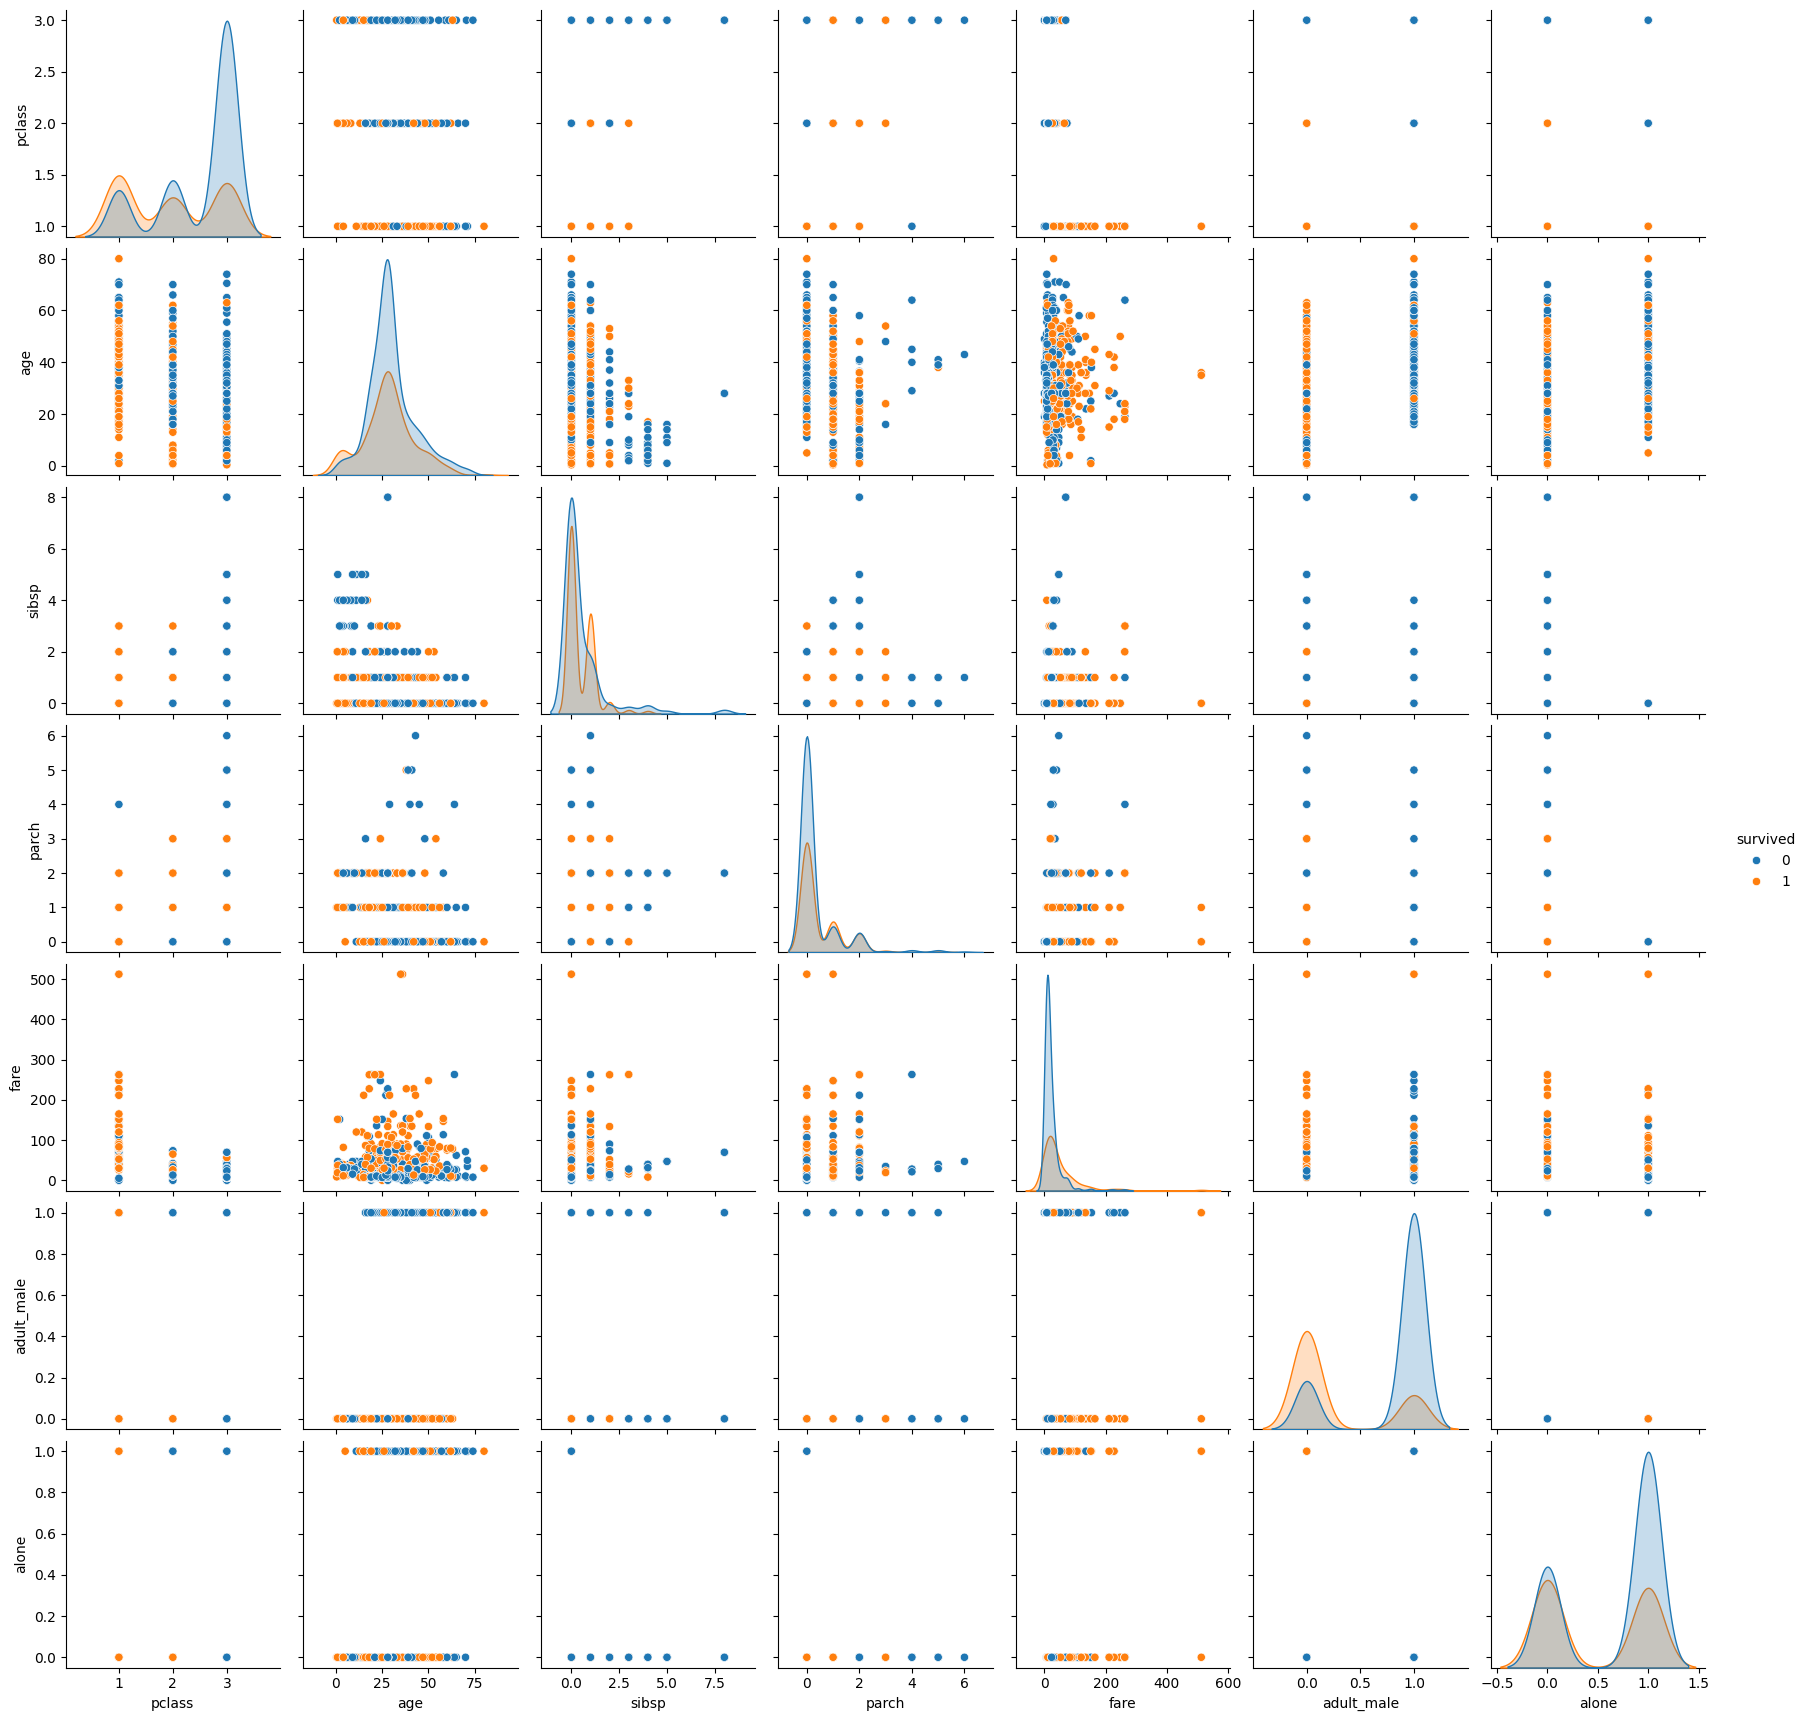

In [41]:
sns.pairplot(titanic, hue='survived')
plt.show()

그림을 보면 pclass, sibsp, parch, alone 변수에 대해 종속 변수 값을 나타내는 점이 퍼지지 않고 세로 또는 가로로 일정 지점에만 있다.
이 변수들이 연속되는 실수형 값이 아니라 개수를 나타내는 정수형이거나 True/False를 나타내는 boolean 형이기 때문이다.

#### **두 변수의 상관관계 시각화하기**

객실 등급과 생존의 상관관계를 seaborn 패키지의 catplot으로 시각화해본다.

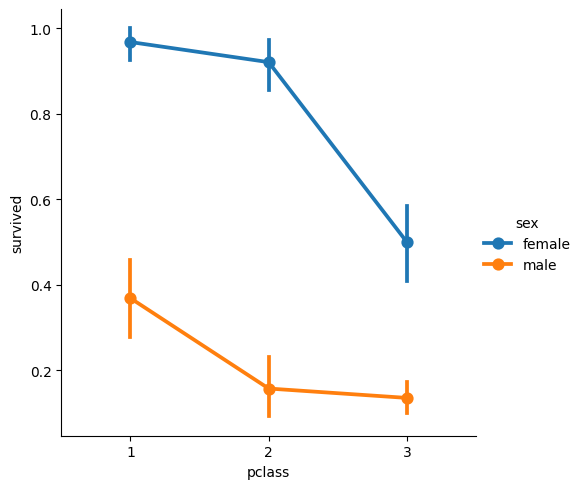

In [43]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')

plt.show()

#### **변수 사이의 상관 계수를 히트맵으로 시각화하기**

변수 중 age를 히트맵으로 나타내려면 카테고리 형식이어야 하므로 10살 단위로 0부터 7까지 카테고리 값으로 치환한다.
그리고 상관 계수를 계산하려면 숫자 데이터이어야 하므로 sex 변수값을 0과 1로 치환한다.
가지고 있는 데이터에는 동행한 형제의 수(sibsp)와 부모/자식의 수(parch)가 있는데 이를 더해서 가족의 수를 새로운 family로 추가하여 히트맵을 표현해본다.

In [44]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [45]:
titanic['age2'] = titanic['age'].apply(category_age)

In [46]:
titanic['sex'] = titanic['sex'].map({'male': 1, 'female': 0})

In [47]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

In [48]:
titanic.to_csv('./titanic3.csv', index=False)

In [51]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]

In [52]:
colormap = plt.cm.RdBu

<Axes: >

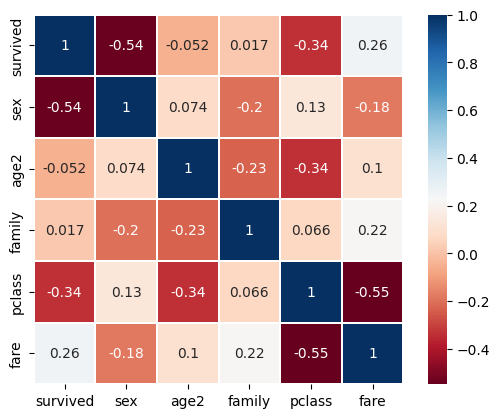

In [53]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 10})